In today's lesson we talked about linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs. You can continue using the same jupyter file. The file can be found in the `Data` folder.

### Get the data 

Use the jupyter file from the previous lab on Customer Analysis

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

- For the numerical variables:
  - Use Matplotlib to construct histograms to check the normality of the numerical variables visually
  - Check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
  
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

- Split data into Y (`total_claim_amount`) and X (numerical, independent variables)

- Conduct Linear Regressions
  - Using Statsmodels
  - Using sklearn
  - Interpret results

In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Data/marketing_customer_analysis.csv') 
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [3]:
def colset(df):
    cols = []  
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols

In [4]:
colset(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = ['object'])

In [7]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Text(0.5, 1.0, 'Correlation between numerical variables')

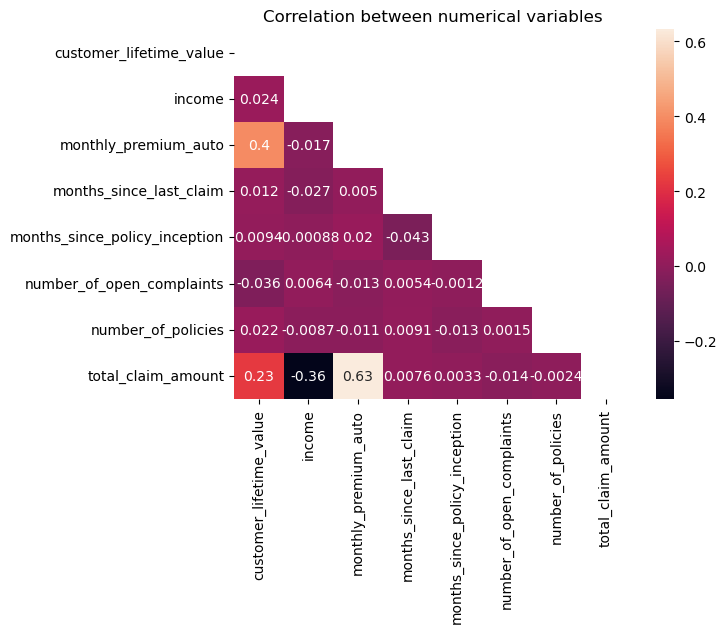

In [8]:
corrnum = numerical.corr()
mask = np.triu(np.ones_like(corrnum, dtype=bool))
corr_var = sns.heatmap(corrnum,annot=True,mask=mask)
plt.title("Correlation between numerical variables")

In [9]:
Y = numerical['total_claim_amount'] 
X = numerical.drop(['total_claim_amount'], axis=1) 

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:49:36   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Sklearn

In [10]:
Y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.52


In [11]:
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse)

R2 value is =  0.52
The intercept of the model is =  72.39096819184198
The coefficients of the model are =  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224916


El R2 del modelo sin modificar es de 0.52, no es demasiado alto pero es aceptable para una primer análisis. 
En cuanto a las variables dependientes: 
La que más peso tiene dentro del modelo (obviando la constante) sería la de monthly premium auto, con un coeficiente de 5.34 seguido de number of open complaints con un coeficiente de -1.37.

Respecto al P_value tenemos algunas variables dentro del modelo que deberíamos revisar. Months since last claim, months since policy inception, number od open complaints & number of policies tienen un P-valor demasiado alto 